<a href="https://colab.research.google.com/github/Mamedova-S/VKR_Mamedova/blob/main/src/audio/xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read The Train and Test csvs
import pandas as pd
trdf = pd.read_csv('/content/drive/MyDrive/CV-EmpathNet/train_text_split.csv')
trdf

,Participant_ID,Gender,PHQ_Binary,PHQ_Score,PCL-C (PTSD),PTSD Severity,Sample,Transcript
0,302,male,0,4,0,28,302,just move around a little bit when you're fin...
1,303,female,0,0,0,17,303,wow okay when you're finished when she's done...
2,304,female,0,6,0,20,304,so we'll just move around a little bit tonight...
3,305,male,0,7,0,28,305,okay looks good so we can just move around a l...
4,307,female,0,4,0,23,307,looking at you all right okay so now let's mak...
...,...,...,...,...,...,...,...,...
158,695,male,0,7,1,62,695,okay I will press the button just push the ...
159,697,male,0,5,0,24,697,okie dokie yeah okay here we go I'm not a t...
160,702,male,0,0,0,19,702,hi I'm not a therapist are you okay yes oka...
161,703,male,0,8,0,28,703,and please are you okay with this yes doing ...


In [ ]:
tedf = pd.read_csv('/content/drive/MyDrive/CV-EmpathNet/test_text_split.csv')
tedf

,Participant_ID,Gender,PHQ_Binary,PHQ_Score,PCL-C (PTSD),PTSD Severity,Sample,Transcript
0,600,female,0,5,0,23.0,600,okay there she is coming to go ahead and Shrin...
1,602,female,1,13,1,67.0,602,this is super need I like this me either at a...
2,604,male,1,12,0,30.0,604,I passed out to make sure that our audio recog...
3,605,male,0,2,0,23.0,605,remember to bring up a virtual human for a sec...
4,606,female,0,5,0,46.0,606,hey I just got it I just got a new so okay so ...
5,607,female,0,7,0,29.0,607,bring her up for a quick second here bring he...
6,609,male,0,0,0,19.0,609,research experience actually going to see a v...
7,615,male,0,3,0,22.0,615,I'm going to have you alert me to look up sur...
8,618,male,0,4,0,23.0,618,you live the are you what are you going to g...
9,619,female,0,6,0,37.0,619,that should be fine in the matching to put thi...


In [ ]:
tp = trdf.shape[0]
ts = tedf.shape[0]
print('Train Participants:', tp)
print('Test Participants:', ts)
print('Total Participants:', ts+tp)

Train Participants: 163
Test Participants: 56
Total Participants: 219


## Предобработка данных


In [ ]:
# !rm -rf train
# !rm -rf test

In [ ]:
#Seperate Images Into Train and Test Folders and 0 and 1 class.
import os

os.makedirs('/content/train/1', exist_ok=True)
os.makedirs('/content/train/0', exist_ok=True)

os.makedirs('/content/test/1', exist_ok=True)
os.makedirs('/content/test/0', exist_ok=True)

In [ ]:
from shutil import copy2
src = '/content/drive/MyDrive/EmpathNet-main/materials/Data/spectogram_images_mel_frequency/spectogram_images'
# src = '/content/drive/MyDrive/EmpathNet-main/materials/Data/spectogram_images_MFCC/spectogram_images'
dst = '/content/train/0'
for id in trdf[trdf['PHQ_Binary']==0]['Participant_ID']:
  copy2(os.path.join(src, str(id) +'_P_spectrogram.png'), dst)

dst = '/content/train/1'
for id in trdf[trdf['PHQ_Binary']==1]['Participant_ID']:
  copy2(os.path.join(src, str(id) +'_P_spectrogram.png'), dst)

dst = '/content/test/1'
for id in tedf[tedf['PHQ_Binary']==1]['Participant_ID']:
  copy2(os.path.join(src, str(id) +'_P_spectrogram.png'), dst)

dst = '/content/test/0'
for id in tedf[tedf['PHQ_Binary']==0]['Participant_ID']:
  copy2(os.path.join(src, str(id) +'_P_spectrogram.png'), dst)


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt
import inspect
from tqdm import tqdm
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Preliminary Train and Test ImageDataGenerators
preproc_func = tf.keras.applications.densenet.preprocess_input
# preproc_func = tf.keras.applications.xception.preprocess_input

In [ ]:
#batch size
bs = 4
train_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preproc_func)
train_gen = train_datagen.flow_from_directory('/content/train', (224,224), class_mode = 'binary', batch_size = bs, shuffle=True, seed=42)
# train_gen = train_datagen.flow_from_directory('/content/train', (224,224), class_mode = 'categorical', batch_size = bs, shuffle=True, seed=42)

print('Class Indices')
print(train_gen.class_indices)

Found 163 images belonging to 2 classes.
Class Indices
{'0': 0, '1': 1}


In [ ]:
#batch size
bs = 4
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preproc_func)
# test_gen = train_datagen.flow_from_directory('/content/test', (224,224), class_mode = 'categorical', batch_size = bs, shuffle=True, seed=42)
test_gen = train_datagen.flow_from_directory('/content/test', (224,224), class_mode = 'binary', batch_size = bs, shuffle=True, seed=42)

print('Class Indices')
print(test_gen.class_indices)

Found 56 images belonging to 2 classes.
Class Indices
{'0': 0, '1': 1}


## Xception

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
preproc_func = tensorflow.keras.applications.xception.preprocess_input

In [ ]:
#batch size
bs = 32
train_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preproc_func)
train_gen = train_datagen.flow_from_directory('/content/train', (224,224), class_mode = 'binary', batch_size = bs, shuffle=True, seed=42)

print('Class Indices')
print(train_gen.class_indices)

Found 163 images belonging to 2 classes.
Class Indices
{'0': 0, '1': 1}


In [ ]:
#batch size
bs = 32
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preproc_func)
test_gen = train_datagen.flow_from_directory('/content/test', (224,224), class_mode = 'binary', batch_size = bs, shuffle=True, seed=42)

print('Class Indices')
print(test_gen.class_indices)

Found 56 images belonging to 2 classes.
Class Indices
{'0': 0, '1': 1}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.xception import Xception


pretrained_model = Xception(include_top=False, weights='imagenet', input_shape=(224,224,3))
pretrained_model.trainable = False
model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

83683744/83683744 [==============================] - 4s 0us/step


In [ ]:
optim = tf.keras.optimizers.Adam(
    # learning_rate=0.001,
    # learning_rate=0.00001,
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optim)

In [ ]:
#Whole Model Trainable
for layer in model.layers:
  layer.trainable = True

#Whole Model Trainable
for layer in model.layers:
  print(layer.trainable)

True
True
True


In [ ]:
#With 0.0001 lr.
n_epochs = 1000
num_train = trdf.shape[0]
num_iterations = int(num_train/bs)

history = model.fit(train_gen, epochs=n_epochs, validation_data=test_gen, steps_per_epoch=num_iterations)

Epoch 1/1000
5/5 [==============================] - 17s 803ms/step - loss: 0.5989 - accuracy: 0.7710 - val_loss: 0.6205 - val_accuracy: 0.6964
Epoch 2/1000
5/5 [==============================] - 1s 212ms/step - loss: 0.5413 - accuracy: 0.7710 - val_loss: 0.6511 - val_accuracy: 0.6964
Epoch 3/1000
5/5 [==============================] - 1s 182ms/step - loss: 0.5385 - accuracy: 0.7710 - val_loss: 0.6660 - val_accuracy: 0.6964
Epoch 4/1000
5/5 [==============================] - 1s 192ms/step - loss: 0.5433 - accuracy: 0.7710 - val_loss: 0.6703 - val_accuracy: 0.6964
Epoch 5/1000
5/5 [==============================] - 1s 192ms/step - loss: 0.5538 - accuracy: 0.7634 - val_loss: 0.6509 - val_accuracy: 0.6964
Epoch 6/1000
5/5 [==============================] - 1s 219ms/step - loss: 0.5640 - accuracy: 0.7557 - val_loss: 0.6297 - val_accuracy: 0.6964
Epoch 7/1000
5/5 [==============================] - 1s 230ms/step - loss: 0.5351 - accuracy: 0.7710 - val_loss: 0.6284 - val_accuracy: 0.6964
Epoch

In [ ]:
optim = tf.keras.optimizers.Adam(
    # learning_rate=0.001,
    # learning_rate=0.00001,
    learning_rate=0.00001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

# model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optim)

In [ ]:
#With 0.00001 lr.
n_epochs = 1000
num_train = trdf.shape[0]
num_iterations = int(num_train/bs)

history = model.fit(train_gen, epochs=n_epochs, validation_data=test_gen, steps_per_epoch=num_iterations)

Epoch 1/1000
5/5 [==============================] - 36s 955ms/step - loss: 5.5332 - accuracy: 0.7481 - val_loss: 0.8610 - val_accuracy: 0.6964
Epoch 2/1000
5/5 [==============================] - 3s 508ms/step - loss: 2.3375 - accuracy: 0.7863 - val_loss: 1.6397 - val_accuracy: 0.6964
Epoch 3/1000
5/5 [==============================] - 3s 519ms/step - loss: 1.5119 - accuracy: 0.7634 - val_loss: 2.3305 - val_accuracy: 0.6964
Epoch 4/1000
5/5 [==============================] - 3s 627ms/step - loss: 0.6721 - accuracy: 0.8062 - val_loss: 2.5897 - val_accuracy: 0.6964
Epoch 5/1000
5/5 [==============================] - 3s 653ms/step - loss: 0.3663 - accuracy: 0.8244 - val_loss: 2.7623 - val_accuracy: 0.6964
Epoch 6/1000
5/5 [==============================] - 3s 537ms/step - loss: 0.3175 - accuracy: 0.8550 - val_loss: 2.7537 - val_accuracy: 0.6964
Epoch 7/1000
5/5 [==============================] - 3s 533ms/step - loss: 0.3340 - accuracy: 0.8015 - val_loss: 2.8423 - val_accuracy: 0.6964
Epoch

# Аугментация - SpectAug + Gaussian Noise Injection

In [ ]:
#Load Numpy Array Of Images.
import numpy as np

train_array = np.load(r'/content/drive/MyDrive/CV-EmpathNet/train_text.npy')
train_array.shape

(163, 768)

In [ ]:
#Load Numpy Array Of Images.
import numpy as np

train_array = np.load(r'/content/drive/MyDrive/CV-EmpathNet/train_image.npy')
train_array.shape

(163, 224, 224)

In [ ]:
#Load Numpy Array Of Images.
import numpy as np

train_array = np.load(r'/content/drive/MyDrive/CV-EmpathNet/train_image_3_channels.npy')
train_array.shape

(163, 288, 432, 3)

In [ ]:
!pip install wand
!apt-get install libmagickwand-dev


In [ ]:
# !rm -rf spect_aug_noise

In [ ]:
# !rm -rf train_aug_noise
# !rm -rf test_aug_noise

In [ ]:
!cp -r train train_aug_noise
!cp -r test test_aug_noise

In [ ]:
#Function Too Perform SpecAugment Strategy, placing random vertical and horizontal masks on the frequency and time domain.

import cv2
import random
from wand.image import Image


src = '/content/train/0/302_P_spectrogram.png'
dst = 'aug_img.jpg'
n_vertical = 1
nv_width = 1
n_hor = 1
nh_width = 1

def aug(src, dst, n_vertical = 1, nv_width = 1, n_hor = 1, nh_width=1):
  img = cv2.imread(src)

  for i in range(n_vertical):
    start_i = random.randint(0,224-nv_width)
    img[:,start_i:start_i+nv_width,:] = 0

  for i in range(n_hor):
    start_i = random.randint(0,224-nh_width)
    img[start_i:start_i+nh_width,:,:] = 0

  cv2.imwrite(dst, img)


aug(src,dst)



In [ ]:
#SpecAgument

#Increase the number of positive (depressed) class samples by using gaussian noise injection and SpecAugment like data augmentation techniques on them.
from shutil import copy2


# src = '/content/train/0'
# dst = '/content/train_aug_noise/0'
# for id in trdf[trdf['PHQ_Binary']==0]['Participant_ID']:
#   with Image(filename = os.path.join(src, str(id) +'_P_spectrogram.png')) as img:
#     img.noise("gaussian")
#     img.save(filename = os.path.join(dst, str(id) +'aug_P_spectrogram.png'))

src = '/content/train/1'
dst = '/content/train_aug_noise/1'
for id in trdf[trdf['PHQ_Binary']==1]['Participant_ID']:
  aug(os.path.join(src, str(id) +'_P_spectrogram.png'),os.path.join(dst, str(id) +'saug_P_spectrogram.png'))

src = '/content/test/1'
dst = '/content/test_aug_noise/1'
for id in tedf[tedf['PHQ_Binary']==1]['Participant_ID']:
  aug(os.path.join(src, str(id) +'_P_spectrogram.png'),os.path.join(dst, str(id) +'saug_P_spectrogram.png'))


# src = '/content/test/0'
# dst = '/content/test_aug_noise/0'
# for id in tedf[tedf['PHQ_Binary']==0]['Participant_ID']:
#   with Image(filename = os.path.join(src, str(id) +'_P_spectrogram.png')) as img:
#     img.noise("gaussian")
#     img.save(filename = os.path.join(dst, str(id) +'aug_P_spectrogram.png'))


In [ ]:
#Adding Gaussian Noise

from shutil import copy2


# src = '/content/train/0'
# dst = '/content/train_aug_noise/0'
# for id in trdf[trdf['PHQ_Binary']==0]['Participant_ID']:
#   with Image(filename = os.path.join(src, str(id) +'_P_spectrogram.png')) as img:
#     img.noise("gaussian")
#     img.save(filename = os.path.join(dst, str(id) +'aug_P_spectrogram.png'))

src = '/content/train/1'
dst = '/content/train_aug_noise/1'
for id in trdf[trdf['PHQ_Binary']==1]['Participant_ID']:
  with Image(filename = os.path.join(src, str(id) +'_P_spectrogram.png')) as img:
    img.noise("gaussian")
    img.save(filename = os.path.join(dst, str(id) +'aug_P_spectrogram.png'))

src = '/content/test/1'
dst = '/content/test_aug_noise/1'
for id in tedf[tedf['PHQ_Binary']==1]['Participant_ID']:
  with Image(filename = os.path.join(src, str(id) +'_P_spectrogram.png')) as img:
    img.noise("gaussian")
    img.save(filename = os.path.join(dst, str(id) +'aug_P_spectrogram.png'))

# src = '/content/test/0'
# dst = '/content/test_aug_noise/0'
# for id in tedf[tedf['PHQ_Binary']==0]['Participant_ID']:
#   with Image(filename = os.path.join(src, str(id) +'_P_spectrogram.png')) as img:
#     img.noise("gaussian")
#     img.save(filename = os.path.join(dst, str(id) +'aug_P_spectrogram.png'))


In [ ]:
#Class Imbalance in the train set is resolved after data augmentation.
p = len(os.listdir('/content/test/1'))
n = len(os.listdir('/content/test/0'))
print(p,n,n/(p+n))

p = len(os.listdir('/content/train/1'))
n = len(os.listdir('/content/train/0'))
print(p,n,n/(p+n))

p = len(os.listdir('/content/test_aug_noise/1'))
n = len(os.listdir('/content/test_aug_noise/0'))
print(p,n,n/(p+n))

p = len(os.listdir('/content/train_aug_noise/1'))
n = len(os.listdir('/content/train_aug_noise/0'))
print(p,n,n/(p+n))

17 39 0.6964285714285714
37 126 0.7730061349693251
51 39 0.43333333333333335
111 126 0.5316455696202531


In [ ]:
# https://medium.com/@makcedward/data-augmentation-for-audio-76912b01fdf6
# https://towardsdatascience.com/audio-deep-learning-made-simple-part-3-data-preparation-and-augmentation-24c6e1f6b52

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
preproc_func = tensorflow.keras.applications.xception.preprocess_input

In [ ]:
#batch size
bs = 32
train_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preproc_func)
train_gen = train_datagen.flow_from_directory('/content/train_aug_noise', (224,224), class_mode = 'binary', batch_size = bs, shuffle=True, seed=42)
# train_gen = train_datagen.flow_from_directory('/content/train', (224,224), class_mode = 'categorical', batch_size = bs, shuffle=True, seed=42)

print('Class Indices')
print(train_gen.class_indices)

Found 237 images belonging to 2 classes.
Class Indices
{'0': 0, '1': 1}


In [ ]:
#batch size
bs = 32
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preproc_func)
test_gen = test_datagen.flow_from_directory('/content/test_aug_noise', (224,224), class_mode = 'binary', batch_size = bs, shuffle=True, seed=42)
# test_gen = test_datagen.flow_from_directory('/content/test', (224,224), class_mode = 'binary', batch_size = bs, shuffle=True, seed=42)

print('Class Indices')
print(test_gen.class_indices)

Found 90 images belonging to 2 classes.
Class Indices
{'0': 0, '1': 1}


In [ ]:
#Custom Callback Function To Save Model Based On A Combined Threshold of train and test accuracy and recall.

import tensorflow as tf
from tensorflow import keras
class RecallAccuracyCallback(keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
      print('Epoch:',epoch, 'Logs:',logs)

      if logs['accuracy']>0.80 and logs['recall']>0.76 and logs['val_accuracy'] > 0.6 and logs['val_recall']>0.8:
        print('Val Accuracy More Than Set Thresholds', logs)
        print('Saving Model','-'*30)
        self.model.save(f'{epoch}_model{str(logs)}.h5')



In [ ]:
#Results Obtained, Models Saved
# 104_model{'loss': 0.4074825346469879, 'accuracy': 0.8374999761581421, 'recall': 0.9130434989929199,  'val_accuracy': 0.6111111044883728, 'val_recall': 0.843137264251709}.h5 'val_loss': 0.6829150915145874,
# 86_model{'loss': 0.4598311483860016, 'accuracy': 0.8374999761581421, 'recall': 0.7702702879905701,  'val_accuracy': 0.6333333253860474, 'val_recall': 0.8039215803146362}.h5 'val_loss': 0.6286814212799072,
# /content/98_model{'loss': 0.39345240592956543, 'accuracy': 0.8581560254096985, 'recall': 0.8529411554336548, , 'val_accuracy': 0.6111111044883728, 'val_recall': 0.843137264251709}.h5

In [ ]:
#Recall Metric For Monitoring
r = tf.keras.metrics.Recall()

# Xception после аугментации

In [ ]:
r = tf.keras.metrics.Recall()

In [ ]:
#Custom Callback Function To Save Xception Model based on  metric thresholds

import tensorflow as tf
from tensorflow import keras
class XceptionRecallAccuracyCallback(keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
      print('Epoch:',epoch, 'Logs:',logs)

      # if logs['accuracy']>0.80 and logs['recall']>0.76 and logs['val_accuracy'] > 0.6 and logs['val_recall']>0.8:
      if logs['accuracy']>0.80 and logs['recall']>0.7 and logs['val_accuracy'] > 0.8 and logs['val_recall']>0.6:
        print('Val Accuracy More Than Set Thresholds', logs)
        print('Saving Model','-'*30)
        self.model.save(f'/content/drive/MyDrive/CV-EmpathNet/XceptionNetWeights/{epoch}_model{str(logs)}.h5')



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications.xception import Xception



pretrained_model = Xception(include_top=False, weights='imagenet', input_shape=(224,224,3))
pretrained_model.trainable = False
model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))



#With 0.0001 lr.
optim = tf.keras.optimizers.Adam(
    # learning_rate=0.001,
    # learning_rate=0.00001,
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

model.compile(loss='binary_crossentropy', metrics=['accuracy', r], optimizer=optim)
n_epochs = 1000
num_train = trdf.shape[0]
num_iterations = int(num_train/bs)

# history = model.fit(train_gen, epochs=n_epochs, validation_data=test_gen, steps_per_epoch=num_iterations, callbacks =[checkpoint1,checkpoint2,checkpoint3,checkpoint4])
# history = model.fit(train_gen, epochs=n_epochs, validation_data=test_gen, steps_per_epoch=num_iterations, callbacks =[checkpoint1,checkpoint2])
history = model.fit(train_gen, epochs=n_epochs, validation_data=test_gen, steps_per_epoch=num_iterations)

83683744/83683744 [==============================] - 5s 0us/step
Epoch 1/1000
5/5 [==============================] - 16s 865ms/step - loss: 0.6955 - accuracy: 0.5063 - recall_1: 0.3973 - val_loss: 0.7437 - val_accuracy: 0.4333 - val_recall_1: 0.0000e+00
Epoch 2/1000
5/5 [==============================] - 2s 434ms/step - loss: 0.7034 - accuracy: 0.5177 - recall_1: 0.0000e+00 - val_loss: 0.7180 - val_accuracy: 0.4333 - val_recall_1: 0.0000e+00
Epoch 3/1000
5/5 [==============================] - 1s 234ms/step - loss: 0.6813 - accuracy: 0.5674 - recall_1: 0.0000e+00 - val_loss: 0.7061 - val_accuracy: 0.4333 - val_recall_1: 0.0000e+00
Epoch 4/1000
5/5 [==============================] - 1s 273ms/step - loss: 0.6769 - accuracy: 0.5674 - recall_1: 0.0000e+00 - val_loss: 0.7192 - val_accuracy: 0.4333 - val_recall_1: 0.0000e+00
Epoch 5/1000
5/5 [==============================] - 1s 251ms/step - loss: 0.6930 - accuracy: 0.5248 - recall_1: 0.0000e+00 - val_loss: 0.7266 - val_accuracy: 0.4333 - val

In [ ]:
#Whole Model Trainable
for layer in model.layers:
  layer.trainable = True

#Whole Model Trainable
for layer in model.layers:
  print(layer.trainable)

True
True
True


In [ ]:
# r = tf.keras.metrics.Recall()


In [ ]:
# Tuning

optim = tf.keras.optimizers.Adam(
    # learning_rate=0.001,
    learning_rate=0.00001,
    # learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)


# model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
# model.compile(loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()], optimizer=optim)
model.compile(loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()], optimizer=optim)
# model.compile(loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()], optimizer=optim)
#With 0.0001 lr.
n_epochs = 817
num_train = trdf.shape[0]
num_iterations = int(num_train/bs)

history = model.fit(train_gen, epochs=n_epochs, validation_data=test_gen, steps_per_epoch=num_iterations)

Epoch 1/1000
5/5 [==============================] - 36s 828ms/step - loss: 5.2014 - accuracy: 0.5437 - recall_2: 0.0267 - val_loss: 0.8802 - val_accuracy: 0.5444 - val_recall_2: 0.8824
Epoch 2/1000
5/5 [==============================] - 5s 1s/step - loss: 1.6281 - accuracy: 0.5887 - recall_2: 0.2000 - val_loss: 0.9590 - val_accuracy: 0.5556 - val_recall_2: 0.9608
Epoch 3/1000
5/5 [==============================] - 3s 520ms/step - loss: 0.7425 - accuracy: 0.7518 - recall_2: 0.7544 - val_loss: 0.8926 - val_accuracy: 0.5667 - val_recall_2: 1.0000
Epoch 4/1000
5/5 [==============================] - 3s 527ms/step - loss: 0.5000 - accuracy: 0.8014 - recall_2: 0.7833 - val_loss: 0.8379 - val_accuracy: 0.5667 - val_recall_2: 1.0000
Epoch 5/1000
5/5 [==============================] - 3s 533ms/step - loss: 0.2830 - accuracy: 0.8794 - recall_2: 0.8971 - val_loss: 0.9645 - val_accuracy: 0.5667 - val_recall_2: 1.0000
Epoch 6/1000
5/5 [==============================] - 3s 525ms/step - loss: 0.3158 -

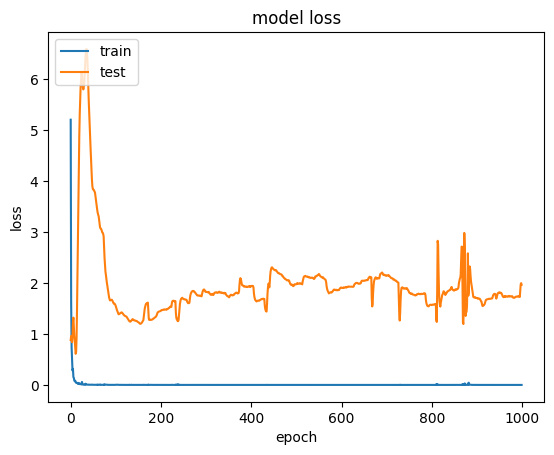

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

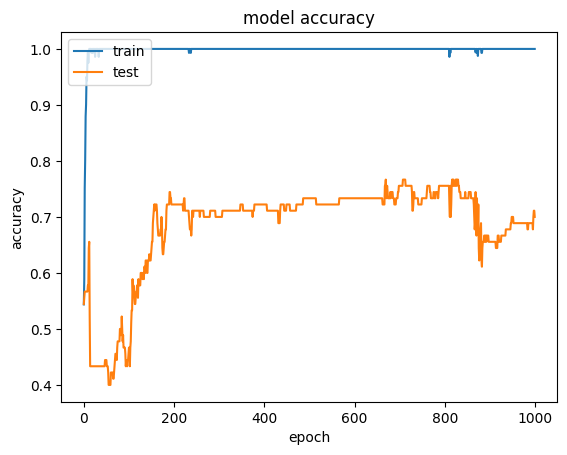

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/xception.h5")
